# Two Dimensional (2D) Position and Orientation

This notebook contains some (programming) exercises belonging to Section 2.1 of the book "Robotics, Vision and Control" of Peter Corke. https://petercorke.com/rvc/home/

Before you start with the exercises:
* Watch the 9 video clips in the online masterclass on 2D geometry: https://robotacademy.net.au/masterclass/2d-geometry/
* Read Section 2.1 of the book (you can skip 2.1.1.2 and 2.1.2.3)

## Pose and transformations 

An object has a postion and an orientation in space. Together, we call this the object's **pose**. In 2D, it is defined by the vector $(x,y,\theta)$, with the position at the point $(x,y)$ (typically in m or mm) and orientation $\theta$ (in radians or rad).

<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig2_6.svg" width=300>

The figure on above shows the situation with $\{A\}$ as the **reference frame** and $\{B\}$ the **coordinate frame** of the object. The coordinate frame is **translated** by the vector $\boldsymbol{t} = (x,y)$ and **rotated** counter-clockwise by the angle $\theta$. Note that we use a **right-handed coordinate frame**. 

<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig2_2.svg" width=300>
A point $\boldsymbol{p}$ has a position ${}^A\!\boldsymbol{p}$ in the reference frame and position ${}^B\!\boldsymbol{p}$ in the coordinate frame $\{B\}$.

The relative pose of the frame ${B}$ with respect to the reference frame $\{A\}$ is denoted as ${}^A\xi_B$, where the leading superscript gives the reference frame and the subscript gives the frame being described. ${}^A\xi_B$ can also be seen as the **transformation** of frame $\{A\}$ to $\{B\}$. If we leaf out the reference frame, as in $\xi_B$, we assume that the pose is relative to the world coordinate frame $\{O\}$.

A point $\boldsymbol{p}$ can be described in both frames using the transformation:
$$
{}^A\!\boldsymbol{p} = {}^A\xi_B \cdot {}^B\!\boldsymbol{p}
$$

Relative poses can be **composes** or **compounded**. That is, they can be put in sequence:
$$
{}^A\xi_C = {}^A\xi_B \oplus {}^B\xi_C
$$
here, on the right-hand side, the subscript of the first transformation needs to match the superscript of the second transformation ($B$ in this case). The equation basically says that the transformation from $\{A\}$ to $\{C\}$ can be obtained from the relative pose from $\{A\}$ to $\{B\}$ and then from $\{B\}$ to $\{C\}$.

<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig2_3.svg" width=400>



## Orientation in 2-Dimensions and SO(2)

We create a $\{V\}$, which is parallel to the earlier provided frame $\{A\}$, but has the origin at the same position as frame $\{B\}$. In other words, $\{V\}$ and $\{B\}$ only differen in the orientation.

<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig2_7.svg" width=300>

If we want to know the position of point $\boldsymbol{p}$ in the frame {$V$}, that is ${}^V\!\boldsymbol{p}$, we can get that by applying a rotation over the angle $\theta$:

$$
{}^V\!\boldsymbol{p} = {}^V\!\boldsymbol{R}_B(\theta) {}^B\!\boldsymbol{p} 
$$

$$
{}^V\!\boldsymbol{p} = 
\begin{pmatrix}
{}^V\!x \\
{}^V\!y 
\end{pmatrix}
= 
\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}
\cdot 
\begin{pmatrix}
{}^B\!x \\
{}^B\!y 
\end{pmatrix}
$$
where the **2-dimenional rotation matrix** is:

$$
{}^V\!\boldsymbol{R}_B(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}
$$ 

The matrix has some properties:
* The first column, $\begin{pmatrix}\cos\theta \\ \sin\theta\end{pmatrix}$ represent the x-axis of {$V$}, $\hat{\boldsymbol{x}}_B$ (see figure above)
* The second column, $\begin{pmatrix}-\sin\theta \\ \cos\theta\end{pmatrix}$ represent the y-axis of {$V$}, $\hat{\boldsymbol{y}}_B$
* These two column vectors are **orthonomal**, meaning that they each have unit length and they are orthogonal (perpendicular to each other). 
* The inverse of the matrix is the same as the transpose: $\boldsymbol{R}^{-1} = \boldsymbol{R}^{T}$
* The 2x2 matrix is part of the orthogonal group of dimension 2, that,  $\boldsymbol{R} \in \mathbf{SO}(2) \subset \mathbb{R}^{2\times2}$

If we want to do the inverse, that is get ${}^B\!\boldsymbol{p}$ from ${}^V\!\boldsymbol{p}$, we get

$$
\begin{pmatrix}
{}^B\!x \\
{}^B\!y 
\end{pmatrix}
= \left({}^V\!\boldsymbol{R}_B\right)^{-1}
\begin{pmatrix}
{}^V\!x \\
{}^V\!y 
\end{pmatrix}
= \left({}^V\!\boldsymbol{R}_B\right)^{T}
\begin{pmatrix}
{}^V\!x \\
{}^V\!y 
\end{pmatrix}
= \left({}^B\!\boldsymbol{R}_V\right)
\begin{pmatrix}
{}^V\!x \\
{}^V\!y 
\end{pmatrix}
$$


### Working with python

To work with the transformations in python, we are going to use the spatialmath library developed by Peter Corke and colleagues as part of the robotics-toolbox.

In the next line, the libary is installed using pip. You need to do this only once. For future use, you can comment this line (#).

In [2]:
# import sys
# !(sys.executable) -m pip install spatialmath-python

We can then work with it by loading the library. 

Remember that 2D orientation is in $\mathbf{SO}(2)$. We can create an instance with `SO2()` or `SO2(angle)`, and print and plot the frames:

V:
   1         0         
   0         1         

B:
   0.9801   -0.1987    
   0.1987    0.9801    



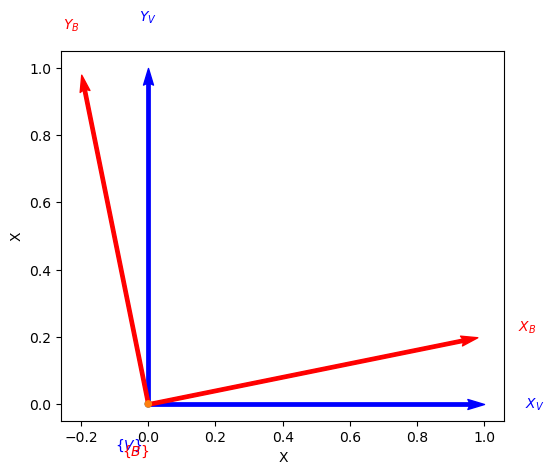

In [3]:
from spatialmath import *
import numpy as np

V = SO2()
B = SO2(0.2)

V.print("V:")
B.print("B:")

V.plot(frame='V', color='blue')
B.plot(frame='B', color='red')

If we have a point ${}^B\!\boldsymbol{p} = \begin{pmatrix}1.0\\0.5\end{pmatrix}$, we can calculate the position of the point in frame {$V$} using 
$$
{}^V\!\boldsymbol{p} = {}^V\!\boldsymbol{R}_B(\theta) {}^B\!\boldsymbol{p}
$$
where 
${}^V\!\boldsymbol{R}_B(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}$, with $\theta=0.2$
here equals the matrix `B` that we just created, as `V` is here the identity matrix.

**Pen-and-paper exercise:**
* Given ${}^B\!\boldsymbol{p}$ and ${}^V\!\boldsymbol{R}_B(\theta)$, calculate ${}^V\!\boldsymbol{p}$ by hand on paper

**Exercise:**
* Study the code below. It calculates the answer to the above exercise using the spatialmath library. 
* Run the code and check if your manually calculate answer on paper is the same.


pV: [[0.88073191]
 [0.68870262]]


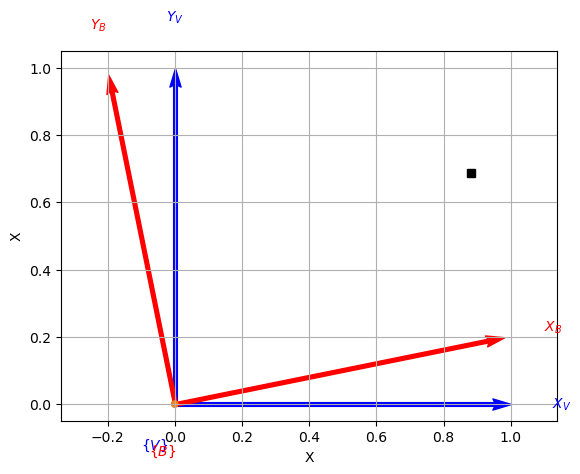

In [4]:
import spatialmath.base as tr
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# Define a point pB in the coordinate frame B
pB = np.array([[1.0],[0.5]])

# Calculate the position of that point in frame V, pV:
pV = B * pB
print("pV:", pV)

# Show frame V and B and show the point (plotted wrt fame V)
V.plot(frame='V', color='blue')
B.plot(frame='B', color='red')
tr.plot_point(pV, 'ks')
plt.axis('equal')
plt.grid()
plt.show()


We might also be interested to do the reverse:

$$
{}^B\!\boldsymbol{p} = {}^B\!\boldsymbol{R}_V(\theta) {}^V\!\boldsymbol{p}
$$

This requires to get the matrix ${}^B\!\boldsymbol{R}_V(\theta)$, which we can get through:

$$
{}^B\!\boldsymbol{R}_V(\theta) = \left({}^V\!\boldsymbol{R}_B(\theta)\right)^{-1}
= \left({}^V\!\boldsymbol{R}_B(\theta)\right)^{T}
$$
Meaning here that we need to get the inverse of matrix `B`, which is the same as getting the transpose of `B`.

**Pen-and-paper exercise:**
* Take ${}^V\!\boldsymbol{p}$ from the previous exercise, calculate the inverse of matrix `B` and calculate ${}^B\!\boldsymbol{p}$. 

**Exercise:**
* Study the code below, run it and see if the answer matches your

In [5]:
Binv = B.inv()

B.print("B")
Binv.print("B^T")

pB = Binv * pV
print("pB:", pB)

B
   0.9801   -0.1987    
   0.1987    0.9801    

B^T
   0.9801    0.1987    
  -0.1987    0.9801    

pB: [[1. ]
 [0.5]]


## Pose in 2-Dimensions and SE(2)

<table><tr><td>(a)
<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig2_7.svg" width=300>
</td><td>&nbsp;&nbsp;&nbsp;&nbsp;</td><td>(b)
<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig2_6.svg" width=300>
</td></tr></table>
    
Let's look back at the two plots above. Above, we have seen how to apply rotations to get from the orientation of frame {$B$} to that of frame {$V$}, as depicted in plot (a). In (b), we want to know how to relate the pose of an object {$B$} to the reference frame {$A$}. 

Since the axes of frame {$V$} anf {$A$} are parallel, these two frames are related by a **translation** over $\begin{pmatrix} x\\ y \end{pmatrix}$:

$$
\begin{pmatrix}
{}^A\!x \\
{}^A\!y 
\end{pmatrix}
=
\begin{pmatrix}
{}^V\!x \\
{}^V\!y 
\end{pmatrix}
+
\begin{pmatrix}
x\\
y
\end{pmatrix}
$$

By substituting $\begin{pmatrix}{}^V\!x \\ {}^V\!y \end{pmatrix}$, we get

$$
\begin{pmatrix}
{}^A\!x \\
{}^A\!y 
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}
\begin{pmatrix}
{}^B\!x \\
{}^B\!y 
\end{pmatrix}
+
\begin{pmatrix}
x\\
y
\end{pmatrix}
$$
where the first part on the right handside is the rotation and the second part is the translation. These two can be combined in a sinlg ematrix multiplication:

$$
\begin{pmatrix}
{}^A\!x \\
{}^A\!y 
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -\sin\theta & x\\
\sin\theta & \cos\theta & y
\end{pmatrix}
\begin{pmatrix}
{}^B\!x \\
{}^B\!y \\
1
\end{pmatrix}
$$

### Homogeneous transformation matrix and SE(2)
You see that we now added a $1$ to the vector representing the position of the point, so that $\boldsymbol{p} \in \mathbb{R}^3$. This is called **homogeneous coordinates**. To make things consistent, we put the complete **transformation** in **homogeneous form**:


$$
\begin{pmatrix}
{}^A\!x \\
{}^A\!y \\
1
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -\sin\theta & x\\
\sin\theta & \cos\theta & y\\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
{}^B\!x \\
{}^B\!y \\
1
\end{pmatrix}
=
\begin{pmatrix}
{}^A\!\boldsymbol{R}_B & \boldsymbol{t} \\
\boldsymbol{0}_{1\times2} & 1
\end{pmatrix}
\begin{pmatrix}
{}^B\!x \\
{}^B\!y \\
1
\end{pmatrix}
$$
where 
${}^A\boldsymbol{T}_B = 
\begin{pmatrix}
{}^A\!\boldsymbol{R}_B & \boldsymbol{t} \\
\boldsymbol{0}_{1\times2} & 1
\end{pmatrix}$ 
is the **homogeneous transformation matrix** holding both the rotatation and translation. 
The matrix is in the special Euclidean group of dimension 2: 
$\boldsymbol{T} \in \mathbf{SE}(2) \subset \mathbb{R}^{3\times3}$. 

Note that 
$$
{}^A\!\boldsymbol{R}_B = {}^V\!\boldsymbol{R}_B
$$
as frame {$A$} and {$V$} are parallel.

Now we can relate the position of point $\boldsymbol{p}$ in frame {$A$} and {$V$}:

$$
{}^A\!\boldsymbol{p} = 
\begin{pmatrix}
{}^A\!\boldsymbol{R}_B & \boldsymbol{t} \\
\boldsymbol{0}_{1\times2} & 1
\end{pmatrix}
{}^B\!\boldsymbol{p}
=
{}^A\boldsymbol{T}_B {}^B\!\boldsymbol{p}
$$

**Exercise:**
* Study the code below to see how you can define 2D coordinate frames.
* In line 5, ${}^B\!\boldsymbol{p} = \begin{pmatrix}1\\0.5\end{pmatrix}$ is given. If {$B$} represents the pose of a robot, this is the position of a point in the coordinate frame of the robot. 
* Calculate ${}^A\!\boldsymbol{p}$, where you can take ${}^A\boldsymbol{T}_B$ as the matrix `B`.

   0.9801   -0.1987    2         
   0.1987    0.9801    1         
   0         0         1         

[[2.88073191]
 [1.68870262]]


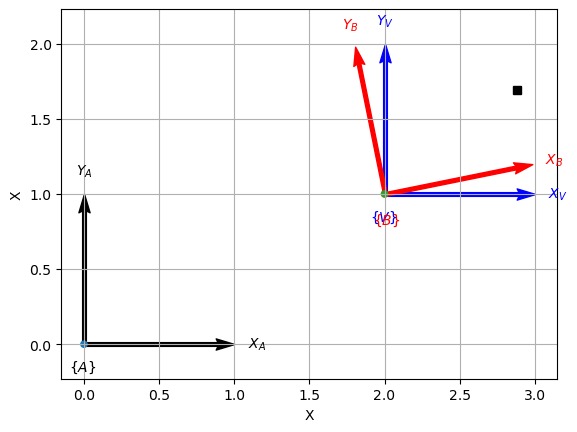

In [6]:
A = SE2()
V = SE2([2,1,0])
# matrix 3x3 for B
B = SE2([2, 1, 0.2])

pB = np.array([[1.0],[0.5]])

## TODO: Calculate pA from pB
pA = B*pB
print(B)
print(pA)
A.plot(frame='A', color='black')
V.plot(frame='V', color='blue')
B.plot(frame='B', color='red')
tr.plot_point(pA, 'ks')
plt.axis('equal')
plt.grid()
plt.show()

#### From transformation matrix to coordinate frame
There is a direct relation between the homogeneous transformation matrix and the coordinate frame:
$$
\boldsymbol{T} =
\begin{pmatrix}
\hat{\boldsymbol{x}}^x & \hat{\boldsymbol{y}}^x & x \\
\hat{\boldsymbol{x}}^y & \hat{\boldsymbol{y}}^y & y \\
0 & 0 & 1    
\end{pmatrix}$$
where:
* the origin of the coordinate frame is at 
$\begin{pmatrix}x\\y\end{pmatrix}$ 
* the x-axis of the coordinate frame is 
$\hat{\boldsymbol{x}} = \begin{pmatrix}   
\hat{\boldsymbol{x}}^x \\ \hat{\boldsymbol{x}}^y
\end{pmatrix}$, which is of unit length (vector has a lenght of 1.0)
* the y-axis of the coordinate frame is 
$\hat{\boldsymbol{y}} = \begin{pmatrix}   
\hat{\boldsymbol{y}}^x \\ \hat{\boldsymbol{y}}^y
\end{pmatrix}$, which is of unit length (vector has a lenght of 1.0)

**Exercise:**
* Use this knowledge to draw the following two coordinate frames:
$$
\boldsymbol{T}_A =
\begin{pmatrix}
0 & 1 & 3 \\
-1 & 0 & 2 \\
0 & 0 & 1    
\end{pmatrix}$$
$$
\boldsymbol{T}_B =
\begin{pmatrix}
\frac{1}{2}\sqrt{2} & \frac{1}{2}\sqrt{2} & 1 \\
-\frac{1}{2}\sqrt{2} & \frac{1}{2}\sqrt{2} & 3 \\
0 & 0 & 1    
\end{pmatrix}$$
* Run the code below to check the results

A:
   0         1         3         
  -1         0         2         
   0         0         1         

B:
   0.7071    0.7071    1         
  -0.7071    0.7071    3         
   0         0         1         



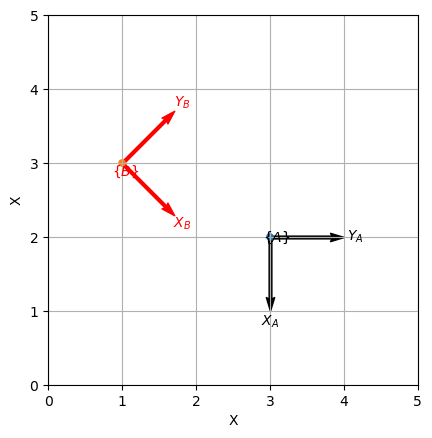

In [7]:
A = SE2( np.array([[0,1,3],[-1,0,2],[0,0,1]]) )
B = SE2( np.array([[np.sqrt(2)/2,np.sqrt(2)/2,1],[-np.sqrt(2)/2,np.sqrt(2)/2,3],[0,0,1]]) )

A.print('A:')
B.print('B:')

A.plot(frame='A', color='black')
B.plot(frame='B', color='red')
plt.xlim(0,5)
plt.ylim(0,5)
plt.grid()
plt.show()

### 2D pose and rigid-body motion

The 2D transformation matrix can store the (relative) **2D pose**, that is $\xi \sim \boldsymbol{T} \in \mathbf{SE}(2)$ and the transformation matrix can also be seen to represent a **rigid-body transformation**. 

As discussed before, the relative pose can also be composed, for instance: ${}^A\xi_C = {}^A\xi_B \oplus {}^B\xi_C$. Using the transformation matrices to represent the relative poses, we can implement this composition using standard matrix multiplication:

$$
{}^A\xi_B \oplus {}^B\xi_C$ \to {}^A\boldsymbol{T}_B {}^B\boldsymbol{T}_C
$$

We can use this, for instance, to simulate the motion of a robot. Let's assume that the robot starts at a pose $(2,1,\pi/2)$ in the world coordinate frame and that every time step, the robot takes a path with the relative pose $(0.5,0.0,0.2)$, that is, it moves 0.5 forward and rotates 0.2 rad counter-clockwise. 

**Pen-and-paper exercise:**
* Calculate the 3x3 transformation matrices for the start pose and for the relative pose
* Run the code below to calculate the matrices and check your answer



In [8]:
start_pose = SE2([2,1,np.pi/2])
rel_pose = SE2([0.5,0,0.2])

start_pose.print("Start pose")
rel_pose.print("Relative pose")

Start pose
   0        -1         2         
   1         0         1         
   0         0         1         

Relative pose
   0.9801   -0.1987    0.5       
   0.1987    0.9801    0         
   0         0         1         



Let's define the start pose as $\boldsymbol{T}_0$ and the relative transformation as ${}^t\boldsymbol{T}_{t+1}$. We can the calculate the next pose at time $t+1$ by:

$$
\boldsymbol{T}_{t+1} =  \boldsymbol{T}_t \cdot {}^t\boldsymbol{T}_{t+1}
$$

**Exercise:**
* In the code below, we will simulate the trajectory of the robot over `nr_steps` time steps. 
* Complete the code in line 11 to apply the relative pose to the current pose `pose` and run the code. You should see a series of coordinate frames representing the robot that makes a left turn (counter-clockwise).
* Change the relative pose so that the robot makes a right turn
* Change the relative pose so that the robot drives straight ahead with a faster velocity and with a starting pose with an orientation of $\pi/4$.
* Change the relative pose so that the robot makes a rotation to the left of 0.2 rad on the spot (so no translation)


#### Question 6.1: Apply relative pose to current pose and run code and see series of coordinate frame representing robot that makes left turn (counter clockwise)

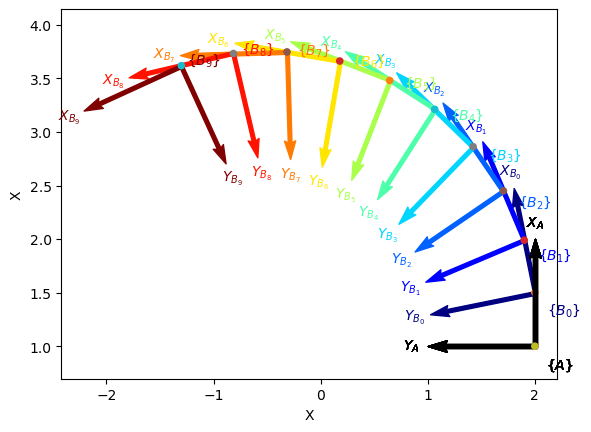

In [9]:


start_pose = SE2([2,1,np.pi/2])
rel_pose = SE2([0.5,0,0.2])
nr_steps = 10

color = iter(cm.jet(np.linspace(0, 1, nr_steps)))

pose = start_pose
for i in range(nr_steps):
  
    # TODO: Calculate the next pose by applying the relative pose transformation to the current pose
    pose = pose * rel_pose
    # Plot it
    c = next(color)
    start_pose.plot(frame='A', color="black")
    pose.plot(frame='B_%d'%i, color=c)
    plt.axis('equal')

#### Question 6.2: Change the relative pose so that the robot makes a right turn instead of a left turn (clockwise and not counter clockwise)

* changed the direction to be -.2 rad instead of positive since neg direction is clockwiuse.,..


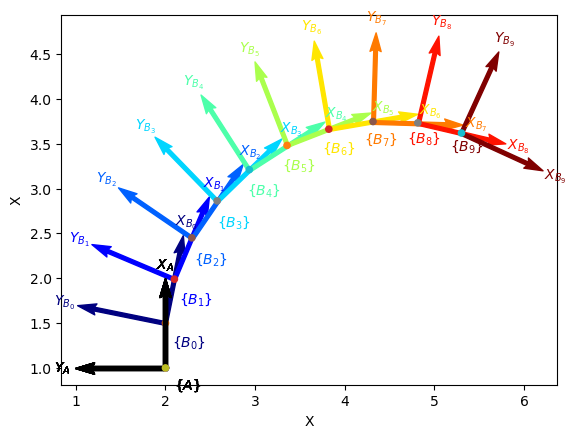

In [13]:
start_pose = SE2([2,1,np.pi/2])
rel_pose = SE2([0.5,0,-0.2])
nr_steps = 10

color = iter(cm.jet(np.linspace(0, 1, nr_steps)))

pose = start_pose
for i in range(nr_steps):
  
    # TODO: Calculate the next pose by applying the relative pose transformation to the current pose
    pose = pose * rel_pose
    # Plot it
    c = next(color)
    start_pose.plot(frame='A', color="black")
    pose.plot(frame='B_%d'%i, color=c)
    plt.axis('equal')

#### Question 6.3: Change the relative pose so that the robot drives straight ahead with a faster velocity and with a starting pose with an orientation of $\pi/4$.
*   changed tx to be 2 instead of .5 so that there is a greater displacemenbt in x direction indication velocity increases
* changed start prose origentation to be pi/4
\

# WAS THIS CORRECT METHOD?

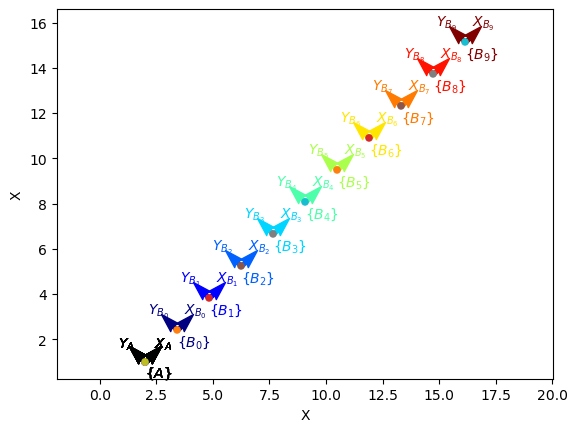

In [14]:

start_pose = SE2([2,1,np.pi/4]) # changed orientation from pi/2 to pi/4
# NO ROTATION FROM RELATIVE POSE!
rel_pose = SE2([2,0,0])  # changed tx to be 2 instead of .5 so that there is a greater displacemenbt in x direction indication velocity increases
nr_steps = 10

color = iter(cm.jet(np.linspace(0, 1, nr_steps)))

pose = start_pose
for i in range(nr_steps):
  
    # TODO: Calculate the next pose by applying the relative pose transformation to the current pose
    pose = pose * rel_pose
    # Plot it
    c = next(color)
    start_pose.plot(frame='A', color="black")
    pose.plot(frame='B_%d'%i, color=c)
    plt.axis('equal')

#### Question 6.4: Change the relative pose so that the robot makes a rotation to the left of 0.2 rad on the spot (so no translation)
* so tx and ty are equal to zero?



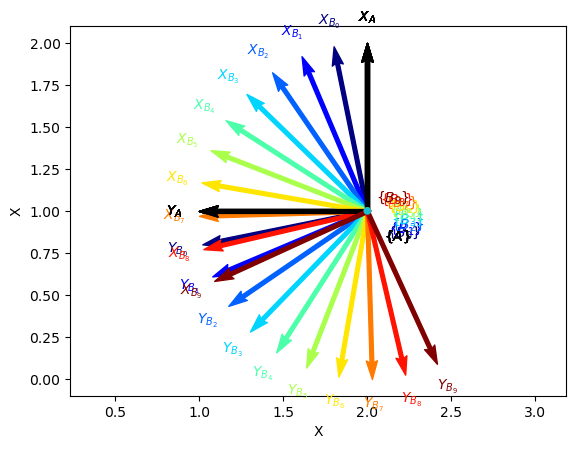

In [12]:


start_pose = SE2([2,1,np.pi/2])
rel_pose = SE2([0,0,0.2]) # robot is rotating with no translation
nr_steps = 10

color = iter(cm.jet(np.linspace(0, 1, nr_steps)))

pose = start_pose
for i in range(nr_steps):
  
    # TODO: Calculate the next pose by applying the relative pose transformation to the current pose
    pose = pose * rel_pose
    # Plot it
    c = next(color)
    start_pose.plot(frame='A', color="black")
    pose.plot(frame='B_%d'%i, color=c)
    plt.axis('equal')

### Relative Pose, the key concepts

The figure below summarizes the key concepts of relative pose: 

<img src="https://git.wur.nl/koots006/msc_course_robotics/raw/main/pictures/fig2_19.svg" width=500>
